In [1]:
from qiskit import *
from qiskit.circuit.library import SXdgGate
from qiskit.visualization import plot_histogram

In [9]:
#ZPLG gate
qc = QuantumCircuit(5)
qc.cx(1, 4)
qc.cx(3, 0)
qc.csx(0, 3)
qc.csx(1, 3)
qc.cx(0, 1)
qc.csx(2, 3)
qc.cx(1, 2)

csxdg_gate = SXdgGate().control()
qc.append(csxdg_gate, [2, 3])

qc.cx(3, 4)
zplg_gate = qc.to_gate()
my_gate = QuantumCircuit(5)
my_gate.append(zplg_gate, [0,1,2,3,4])
my_gate.draw()


#doublefeynman gate
qcf = QuantumCircuit(3)
qcf.cx(0, 2)
qcf.cx(0, 1)
f2g_gate = qcf.to_gate()
f2g_gate

In [5]:
def AU(S0, S1,S2, S3, S4, Cin):
    qc = QuantumCircuit(9, 2)
    
    #conditions
#     if(A == '1'):
#         qc.x(0)
    if(S0 == '1'):
        qc.x(1)
    if(S1== '1'):
        qc.x(2)
    if(Cin == '1'):
        qc.x(3) 
#     if(B == '1'):
#         qc.x(4)
    if(S2 == '1'):
        qc.x(5)
    if(S3 == '1'):
        qc.x(6)
    if(S4 == '1'):
        qc.x(8)
    qc.barrier()
    
    
    
    #adding the fredkin gate
    qc.cswap(0, 1, 2)
    qc.cswap(4, 5, 6)
    
    #importing the zplg gate
    qc.append(zplg_gate, [1, 5, 3, 7, 4])
    
    #adding the double feynman gate
    qc.append(f2g_gate, [8, 3, 4])
    
    #measurements of the carry
    qc.measure(7, 0)
    
    #measuring the output
    qc.measure(3, 1)
    
    #backend
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, memory= True)
    output = job.result().get_memory()[0]
    
    return qc, output

S0 S1 S2 S3 S4 Cin = s carry
0 0 0 0 0 0  = 00
0 0 0 0 0 1  = 10
0 0 0 0 1 0  = 10
0 0 0 0 1 1  = 00
----------------------
0 0 0 1 0 0  = 00
0 0 0 1 0 1  = 10
0 0 0 1 1 0  = 10
0 0 0 1 1 1  = 00
----------------------
0 0 1 0 0 0  = 10
0 0 1 0 0 1  = 01
0 0 1 0 1 0  = 00
0 0 1 0 1 1  = 11
----------------------
0 0 1 1 0 0  = 10
0 0 1 1 0 1  = 01
0 0 1 1 1 0  = 00
0 0 1 1 1 1  = 11
----------------------
0 1 0 0 0 0  = 00
0 1 0 0 0 1  = 10
0 1 0 0 1 0  = 10
0 1 0 0 1 1  = 00
----------------------
0 1 0 1 0 0  = 00
0 1 0 1 0 1  = 10
0 1 0 1 1 0  = 10
0 1 0 1 1 1  = 00
----------------------
0 1 1 0 0 0  = 10
0 1 1 0 0 1  = 01
0 1 1 0 1 0  = 00
0 1 1 0 1 1  = 11
----------------------
0 1 1 1 0 0  = 10
0 1 1 1 0 1  = 01
0 1 1 1 1 0  = 00
0 1 1 1 1 1  = 11
----------------------
1 0 0 0 0 0  = 10
1 0 0 0 0 1  = 01
1 0 0 0 1 0  = 00
1 0 0 0 1 1  = 11
----------------------
1 0 0 1 0 0  = 10
1 0 0 1 0 1  = 01
1 0 0 1 1 0  = 00
1 0 0 1 1 1  = 11
----------------------
1 0 1 0 0 0  = 01
1 0

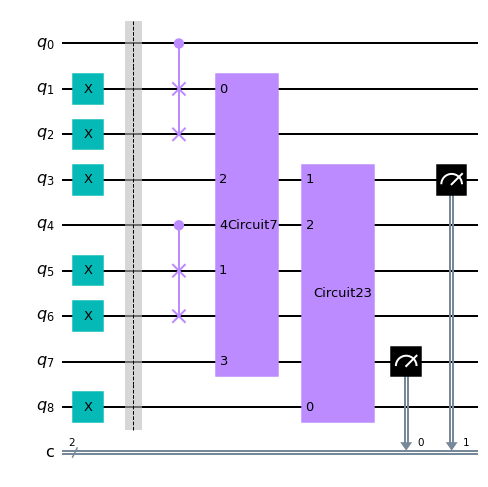

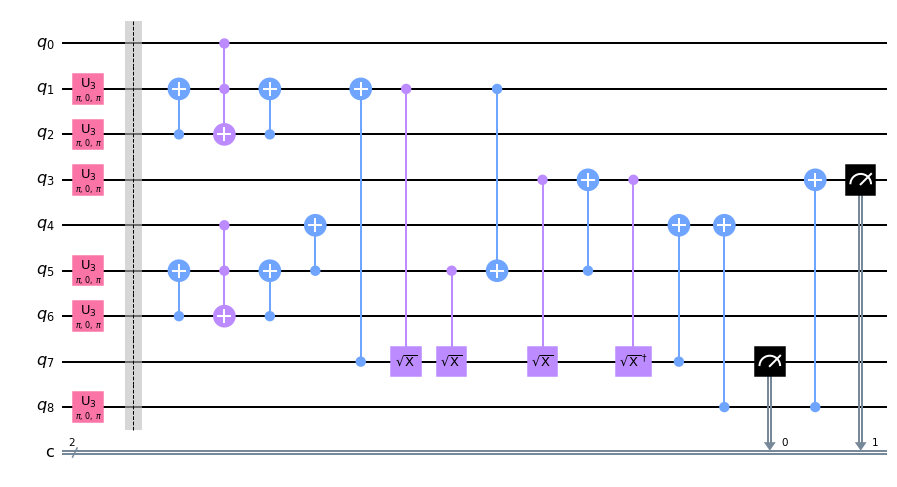

In [6]:
print('{} {} {} {} {} {}'.format('S0', 'S1', 'S2', 'S3', 'S4', 'Cin'), '=', 's carry')
for S0 in ['0', '1']:
    for S1 in ['0', '1']:
        for S2 in ['0', '1']:
            for S3 in ['0', '1']:
                for S4 in ['0', '1']:
                    for Cin in ['0', '1']:
                        qc, output = AU(S0, S1, S2, S3, S4, Cin)
                        print('{} {} {} {} {} {} '.format(S0, S1, S2, S3, S4, Cin), '=', output)
                print('----------------------')

display(qc.draw('mpl'))
display(qc.decompose().draw('mpl'))

In [10]:
def AU1(S0, S1,S2, S3, S4, Cin, A, B):
    qc = QuantumCircuit(9, 2)
    
    #conditions
    if(A == '1'):
        qc.x(0)
    if(S0 == '1'):
        qc.x(1)
    if(S1== '1'):
        qc.x(2)
    if(Cin == '1'):
        qc.x(3) 
    if(B == '1'):
        qc.x(4)
    if(S2 == '1'):
        qc.x(5)
    if(S3 == '1'):
        qc.x(6)
    if(S4 == '1'):
        qc.x(8)
    qc.barrier()
    
    
    
    #adding the fredkin gate
    qc.cswap(0, 1, 2)
    qc.cswap(4, 5, 6)
    
    #importing the zplg gate
    qc.append(zplg_gate, [1, 5, 3, 7, 4])
    
    #adding the double feynman gate
    qc.append(f2g_gate, [8, 3, 4])
    
    #measurements of the carry
    qc.measure(7, 0)
    
    #measuring the output
    qc.measure(3, 1)
    
    #backend
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, memory= True)
    output = job.result().get_memory()[0]
    
    return qc, output

S0 S1 S2 S3 S4 Cin A B = s c/b
0  0  0  0  0  0  0  0 = 00
0  0  0  0  0  0  0  1 = 00
0  0  0  0  0  0  1  0 = 00
0  0  0  0  0  0  1  1 = 00
0  0  0  0  0  1  0  0 = 10
0  0  0  0  0  1  0  1 = 10
0  0  0  0  0  1  1  0 = 10
0  0  0  0  0  1  1  1 = 10
0  0  0  0  1  0  0  0 = 10
0  0  0  0  1  0  0  1 = 10
0  0  0  0  1  0  1  0 = 10
0  0  0  0  1  0  1  1 = 10
0  0  0  0  1  1  0  0 = 00
0  0  0  0  1  1  0  1 = 00
0  0  0  0  1  1  1  0 = 00
0  0  0  0  1  1  1  1 = 00
----------------------
0  0  0  1  0  0  0  0 = 00
0  0  0  1  0  0  0  1 = 10
0  0  0  1  0  0  1  0 = 00
0  0  0  1  0  0  1  1 = 10
0  0  0  1  0  1  0  0 = 10
0  0  0  1  0  1  0  1 = 01
0  0  0  1  0  1  1  0 = 10
0  0  0  1  0  1  1  1 = 01
0  0  0  1  1  0  0  0 = 10
0  0  0  1  1  0  0  1 = 00
0  0  0  1  1  0  1  0 = 10
0  0  0  1  1  0  1  1 = 00
0  0  0  1  1  1  0  0 = 00
0  0  0  1  1  1  0  1 = 11
0  0  0  1  1  1  1  0 = 00
0  0  0  1  1  1  1  1 = 11
----------------------
0  0  1  0  0  0  0  0 = 10

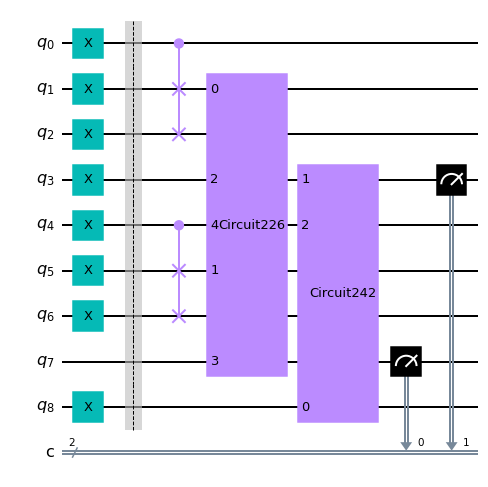

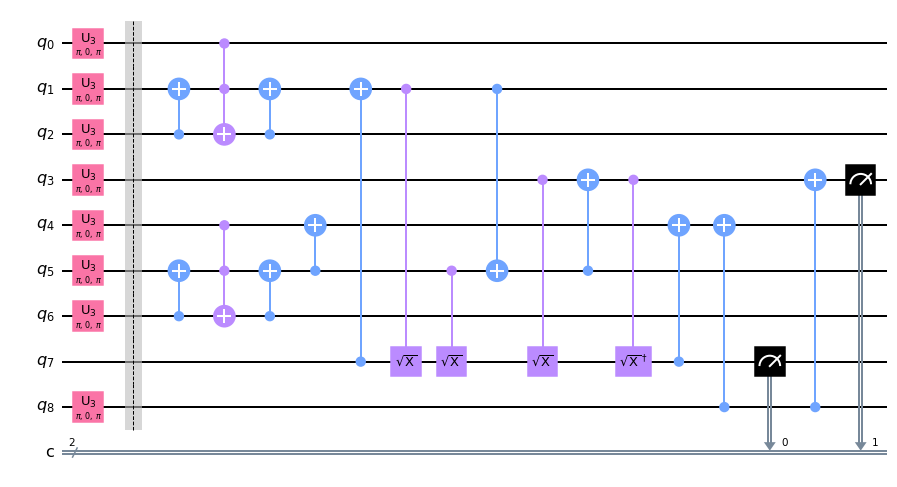

In [11]:
print('{} {} {} {} {} {} {} {}'.format('S0', 'S1', 'S2', 'S3', 'S4', 'Cin', 'A', 'B'), '=', 's c/b')
for S0 in ['0', '1']:
    for S1 in ['0', '1']:
        for S2 in ['0', '1']:
            for S3 in ['0', '1']:
                for S4 in ['0', '1']:
                    for Cin in ['0', '1']:
                        for A in ['0', '1']:
                            for B in ['0', '1']: 
                                qc, output = AU1(S0, S1, S2, S3, S4, Cin, A, B)
                                print('{}  {}  {}  {}  {}  {}  {}  {}'.format(S0, S1, S2, S3, S4, Cin, A, B), '=', output)
                print('----------------------')

display(qc.draw('mpl'))
display(qc.decompose().draw('mpl'))

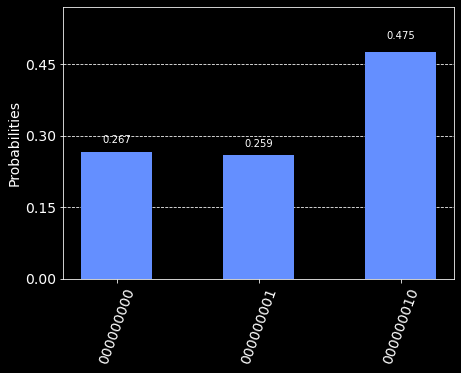

In [18]:
#histogram plot of the AU gate

qc = QuantumCircuit(9, 9)
for i in range(4):
    qc.h(i)

#adding the fredkin gate
qc.cswap(0, 1, 2)
qc.cswap(4, 5, 6)

#importing the zplg gate
qc.append(zplg_gate, [1, 5, 3, 7, 4])

#adding the double feynman gate
qc.append(f2g_gate, [8, 3, 4])

#measurements of the carry
qc.measure(7, 0)

#measuring the output
qc.measure(3, 1)

job = execute(qc, backend = Aer.get_backend('qasm_simulator'), shots=1024)
result = job.result()
count = result.get_counts()
plot_histogram(count)

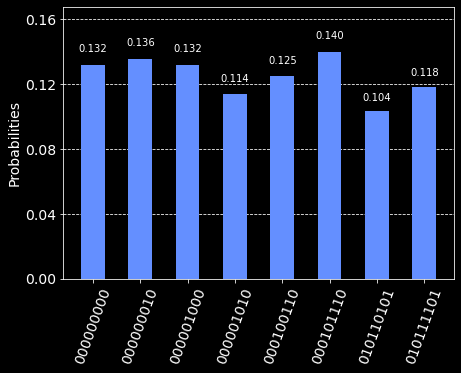

In [23]:
#histogram plot of the AU gate

qc = QuantumCircuit(9, 9)
for i in range(4):
    qc.h(i)

#adding the fredkin gate
qc.cswap(0, 1, 2)
qc.cswap(4, 5, 6)

#importing the zplg gate
qc.append(zplg_gate, [1, 5, 3, 7, 4])

#adding the double feynman gate
qc.append(f2g_gate, [8, 3, 4])

#measurements of the carry
qc.measure(7, 0)

#measuring the output
qc.measure(3, 1)

qc.measure(1, 2)
qc.measure(2, 3)
qc.measure(4, 4)
qc.measure(5, 5)
qc.measure(6, 6)
qc.measure(7, 7)

job = execute(qc, backend = Aer.get_backend('qasm_simulator'), shots=1024)
result = job.result()
count = result.get_counts()
plot_histogram(count)

In [9]:
IBMQ.save_account("35e27d8d7b2151e13807719aac67740cf61a01cd7f6b546559ccee02dcdd225f22b71a831c620edf0809d29914e69fb9d62ca27f8c9035bb630a529ad40bcf88")

configrc.store_credentials:WARNING:2021-07-19 14:57:41,729: Credentials already present. Set overwrite=True to overwrite.


In [12]:
IBMQ.load_account()
IBMQ.providers()
providers = IBMQ.get_provider('ibm-q')
providers.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer

In [13]:
provider = IBMQ.get_provider("ibm-q")
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
        
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")

ibmq_qasm_simulator has 2 queued and simulated qubits
ibmqx2 has 2 queued and 5 qubits
ibmq_armonk has 3 queued and 1 qubits
ibmq_santiago has 6 queued and 5 qubits
ibmq_bogota has 5 queued and 5 qubits
ibmq_lima has 6 queued and 5 qubits
ibmq_belem has 9 queued and 5 qubits
ibmq_quito has 16 queued and 5 qubits
simulator_statevector has 2 queued and simulated qubits
simulator_mps has 2 queued and simulated qubits
simulator_extended_stabilizer has 2 queued and simulated qubits
simulator_stabilizer has 2 queued and simulated qubits
ibmq_manila has 19 queued and 5 qubits


Job Status: job has successfully run
None


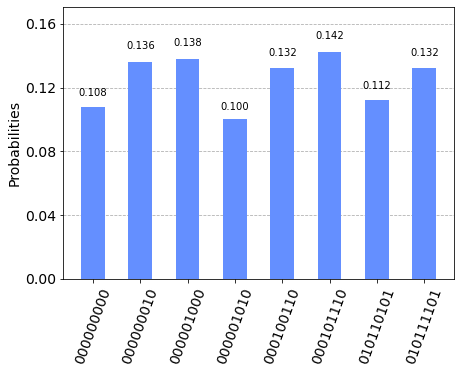

In [15]:
from qiskit.tools.monitor import job_monitor

#histogram plot of the AU gate

qc = QuantumCircuit(9, 9)
for i in range(4):
    qc.h(i)

#adding the fredkin gate
qc.cswap(0, 1, 2)
qc.cswap(4, 5, 6)

#importing the zplg gate
qc.append(zplg_gate, [1, 5, 3, 7, 4])

#adding the double feynman gate
qc.append(f2g_gate, [8, 3, 4])

#measurements of the carry
qc.measure(7, 0)

#measuring the output
qc.measure(3, 1)

qc.measure(1, 2)
qc.measure(2, 3)
qc.measure(4, 4)
qc.measure(5, 5)
qc.measure(6, 6)
qc.measure(7, 7)


backend = provider.get_backend("ibmq_qasm_simulator")
job = execute(qc, backend=backend, shots=500)
print(job_monitor(job))
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts)